<a href="https://colab.research.google.com/github/FranciscoGallegosSilva/Deep-Learning-with-Python/blob/main/Deep_learning_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 2:** *The mathematical building blocks of
neural networks*

2.1 A first look at a neural network

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
# 2.1.1 Loading the MNIST dataset in Keras (handwritten digits)
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Train & Test shape
print(train_images.shape, test_images.shape)
print(len(train_labels), len(test_labels))
print(np.unique(train_labels), np.unique(test_labels))

(60000, 28, 28) (10000, 28, 28)
60000 10000
[0 1 2 3 4 5 6 7 8 9] [0 1 2 3 4 5 6 7 8 9]


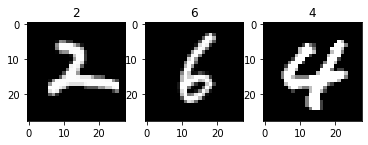

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

# show each image, and make each title the label
# these are grayscale images so use appropriate heatmap
ax1.imshow(train_images[4701], cmap=plt.get_cmap('gray'))
ax1.set_title(str(train_labels[4701]))
ax2.imshow(train_images[4702], cmap=plt.get_cmap('gray'))
ax2.set_title(str(train_labels[4702]))
ax3.imshow(train_images[4703], cmap=plt.get_cmap('gray'))
ax3.set_title(str(train_labels[4703]))

fig.show()

In [ ]:
# 2.1.2 The network architecture
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
layers.Dense(512, activation="relu"),
layers.Dense(10, activation="softmax")
])

In [ ]:
# 2.1.3 The compilation step
model.compile(optimizer="rmsprop",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

In [ ]:
#2.1.4 Preparing the image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
#2.1.5 "Fitting" the model
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2518 - accuracy: 0.9273
Epoch 2/5
469/469 [==============================] - 4s 10ms/step - loss: 0.1030 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0680 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0495 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0375 - accuracy: 0.9888


In [ ]:
#2.1.6 Using the model to make predictions
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0] #Each number of index in that array corresponds to the probability i that digit imagetest_digits[0] belong to class i.

array([4.1526438e-10, 1.3223322e-10, 1.3872458e-06, 2.9845824e-05,
       8.1904714e-13, 9.1709706e-09, 3.6591959e-15, 9.9996793e-01,
       1.6748153e-07, 6.9859487e-07], dtype=float32)

In [ ]:
print(predictions[0].argmax()) #Highest probability score position
print(predictions[0][7]) #Probability score of number 7
print(test_labels[7]) #Check label in 7th position

7
0.99996793
9


In [ ]:
# 2.1.7 Evaluating the model on new data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {round(test_acc,4)}") 

313/313 [==============================] - 1s 2ms/step - loss: 0.0665 - accuracy: 0.9795
test_acc: 0.9795


2.2 Data representations for neural networks

Data stored in multidimensinoal NumPy arrays are called tensors. Tensor is a container for data (usually numerical data). Tensors are a generalization of matrices to an arbitrary number of dimensions -*axis*

In [ ]:
#2.2.1 Scarlars (rank-0 tensors)
x = np.array(12)
x.ndim

0

In [ ]:
#2.2.2 Vectors (rank-1 tensors)
x = np.array([12, 3, 6, 14, 7]) #5-dimensional vector
x.ndim

1

In [ ]:
#2.2.3 Matrices (rank-2 tensors)
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

In [ ]:
#2.2.4 Rank-3 tensors and higher-rank tensors
x = np.array ([[[5, 78, 2, 34, 0],
                [6, 79, 3, 35, 1],
                [7, 80, 4, 36, 2]],
               [[5, 78, 2, 34, 0],
                [6, 79, 3, 35, 1],
                [7, 80, 4, 36, 2]],
               [[5, 78, 2, 34, 0],   
                [6, 79, 3, 35, 1],
                [7, 80, 4, 36, 2]]])
x.ndim

3

By packing rank-3 tensors in an array, you can create a rank-4 tensor, and so on. In deep
learning, you’ll generally manipulate tensors with ranks 0 to 4, although you may go up to 5 if
you process video data.

2.2.5 Key attributes

A tensor is defined by three key attributes:

*   Number of axes (rank)—For instance, a rank-3 tensor has three axes, and a matrix has two axes. This is also called the tensor’s ndim in Python libraries such as NumPy or TensorFlow.
*   Shape—This is a tuple of integers that describes how many dimensions the tensor has along each axis. For instance, the previous matrix example has shape (3, 5), and the rank-3 tensor example has shape (3, 3, 5). A vector has a shape with a single element, such as (5,), whereas a scalar has an empty shape, ().
*   Data type (usually called dtype in Python libraries)—This is the type of the data contained in the tensor; for instance, a tensor’s type could be float16, float32, float64, uint8, and so on. In TensorFlow, you are also likely to come across string tensors.



In [1]:
#Example
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
train_images.ndim

3

In [3]:
train_images.dtype

dtype('uint8')

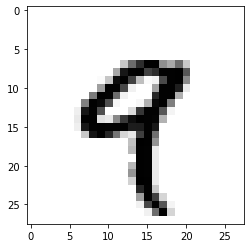

The corresponding label is: 9


In [4]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print("The corresponding label is:",train_labels[4])

2.2.6 Manipulating tensors in Numpy

Selecting specific elements in a tensor is called tensor slincing

In [6]:
#Select digits #10 to #100 and puts them in an array of shape (90, 28 , 28)
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [7]:
#Equivalent and detailed notation
my_slice = train_images[10:100, :, :]
print(my_slice.shape)
my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)

(90, 28, 28)
(90, 28, 28)


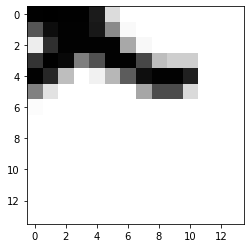

The corresponding label is: 2


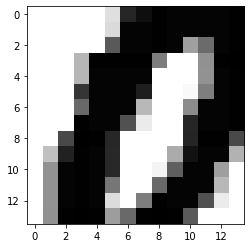

The corresponding label is: 0


In [8]:
#Select 14x14 pixels in the bottom-right corner of all images
my_slice = train_images[:, 14:, 14:]
digit_ex1 = my_slice[5]
plt.imshow(digit_ex1, cmap=plt.cm.binary)
plt.show()
print("The corresponding label is:",train_labels[5])
#Crop the images to patches of 14x14 pixels centered in the middle
my_slice = train_images[:, 7:-7, 7:-7]
digit_ex2 = my_slice[34]
plt.imshow(digit_ex2, cmap=plt.cm.binary)
plt.show()
print("The corresponding label is:",train_labels[34])

2.2.7 The notion of data batches

In general the first axis in all data tensors will be the sample axis (samples dimension). In MNIST samples are images of digits.

DL models don't process an entire dataset at once; they break the data into small batches.

In [9]:
#Batch size of 128
batch = train_images[:128]
# n-th batch
n = 3
btch = train_images[128 * n:128 * (n+1)]

When considering suach a batch tensor, the first axis is called batch axis or bath dimension.

2.2.8 Real-World examples of data tensors



*   Vector data -- rank-2 tensor of shape (sample, features) : Each sample is a vector of numerical attributes ('features')
*   Timeseries data or sequence data -- rank-3 tensors of shpe (samples, timesteps, features): Each sample is a sequence (of lenght 'timesteps') of feature vectors
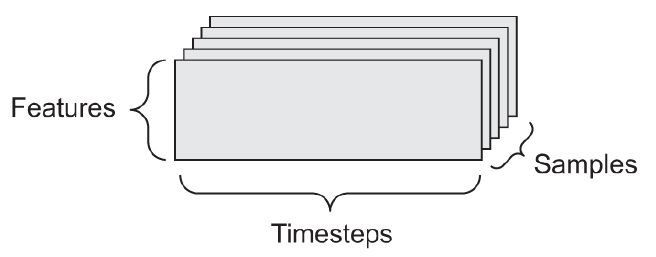

*   Images -- rank-4 tensors of shape (samples, height, width, channels): Each sample is a 2D grid of pixels, and each pixel is represented y a vector of values ('channels')
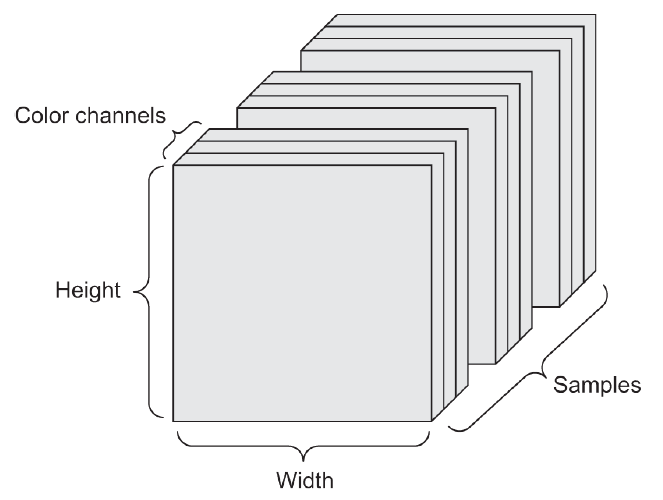

*   Video -- rank-5 tensors of shape (samples, frames, height, width, channels): Each sample is sequence (of lenght 'frames') of images 


2.3 The gears of neural networks: tensor operations

All transformations learned by deep neural networks can be reduced to a handful of tensor operations (or tensor functions) applied to tensors of numeric data. It's possible to add tensors, multiply, and so on. 

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
keras.layers.Dense(512, activation='relu')